In [2]:
url = "https://storage.googleapis.com/applied-dl/heart.csv"
df = pd.read_csv(url)

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [5]:
y = df['target']

In [6]:
x = df.iloc[:, :-1]

In [7]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal


In [8]:
x.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

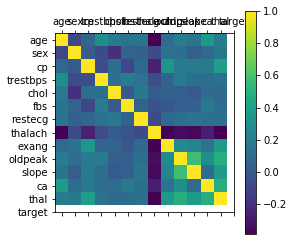

In [9]:
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

In [10]:
new_x = pd.get_dummies(x, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
new_x[columns_to_scale] = standardScaler.fit_transform(new_x[columns_to_scale])

In [11]:
new_x.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_3,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible
0,0.933840,0.745781,-0.260087,0.034808,1.068045,0,1,0,1,0,...,1,1,0,0,0,0,0,1,0,0
1,1.378211,1.592329,0.757388,-1.780616,0.380229,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1.378211,-0.665131,-0.336877,-0.872904,1.325977,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,-1.954574,-0.100766,0.066273,1.634109,2.099771,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
4,-1.510203,-0.100766,-0.816818,0.985744,0.294252,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [151]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y, random_state = 0, test_size = 0.2)

In [33]:
#creating the models
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression()

#fitting the model with train_data
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

#predicting the model
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)

final_pred = np.array([])

#combineing the all output and taking the mode.
for i in range(0, len(x_test)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

#confusion matrix
print confusion_matrix(y_test, final_pred)



[[39  4]
 [ 7 11]]


In [38]:
pred1 = model1.predict_proba(x_test)
pred2 = model2.predict_proba(x_test)
pred3 = model3.predict_proba(x_test)
final_pred = (pred1 + pred2 + pred3)/3

In [40]:
final_pred[:, 1]

array([ 0.01932329,  0.8376757 ,  0.78837486,  0.09343078,  0.01709224,
        0.76401714,  0.19022791,  0.00156271,  0.00237825,  0.4858212 ,
        0.00732315,  0.15648133,  0.89187106,  0.19396956,  0.00652984,
        0.22633554,  0.0035882 ,  0.15471575,  0.79955679,  0.63904621,
        0.02247071,  0.35678272,  0.8259136 ,  0.02432139,  0.01265295,
        0.76919454,  0.0034413 ,  0.01308298,  0.73986541,  0.00387517,
        0.22654026,  0.01648919,  0.03969176,  0.4288565 ,  0.0012317 ,
        0.38945673,  0.00264714,  0.00245874,  0.03626332,  0.00164046,
        0.00560437,  0.0025901 ,  0.212773  ,  0.77692623,  0.00283395,
        0.00523065,  0.18217677,  0.00233921,  0.01087059,  0.07911344,
        0.01998484,  0.81487685,  0.83284068,  0.00287353,  0.70809396,
        0.00186259,  0.06953796,  0.92289409,  0.00153297,  0.12505225,
        0.00443077])

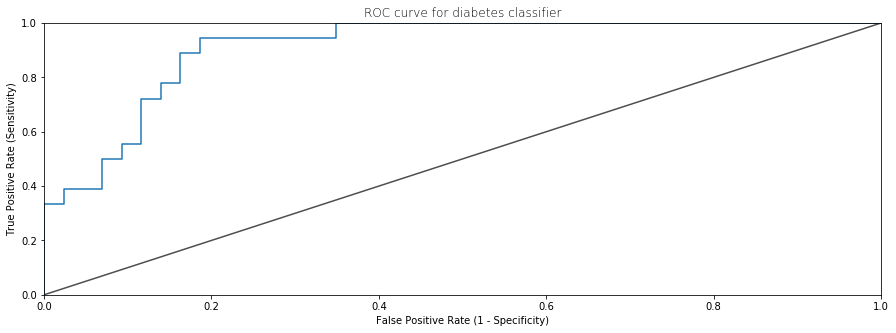

In [47]:
#for average one

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, final_pred[:, 1])

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [48]:
from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

('AUC Score :', 0.91085271317829464)


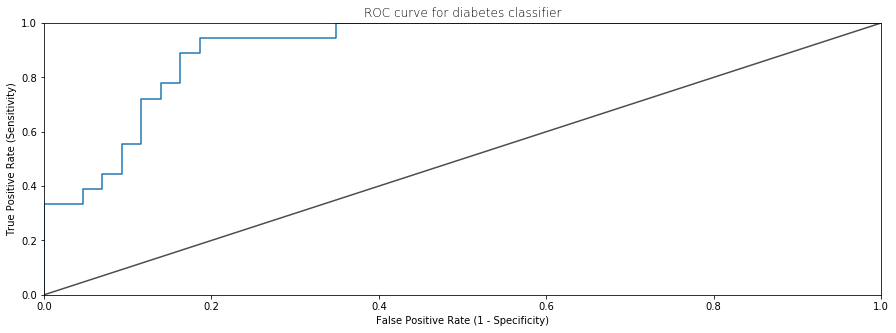

('AUC Score :', 0.9082687338501293)


In [52]:
#with the probability
final_prob = (pred1*0.3 + pred2 * 0.3 + pred3 * 0.4)

fpr, tpr, thresholds = roc_curve(y_test, final_prob[:, 1])

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc_score = auc(fpr, tpr)
print("AUC Score :", auc_score)

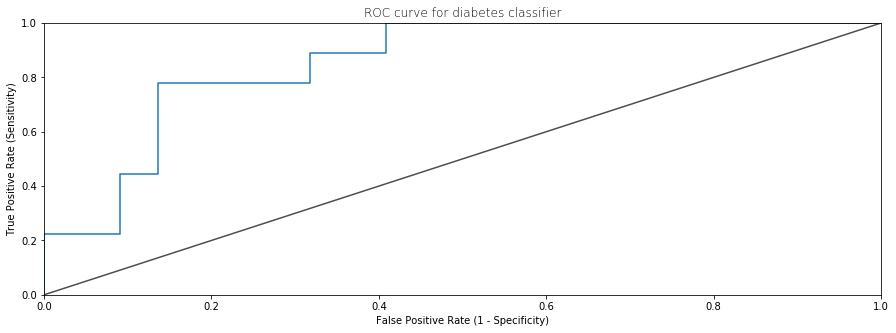

[[20  2]
 [ 7  2]]
('AUC Score :', 0.85353535353535348)


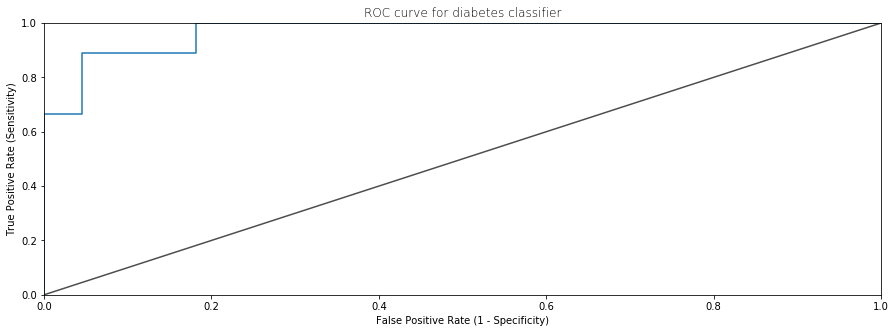

[[20  2]
 [ 1  8]]
('AUC Score :', 0.96969696969696961)


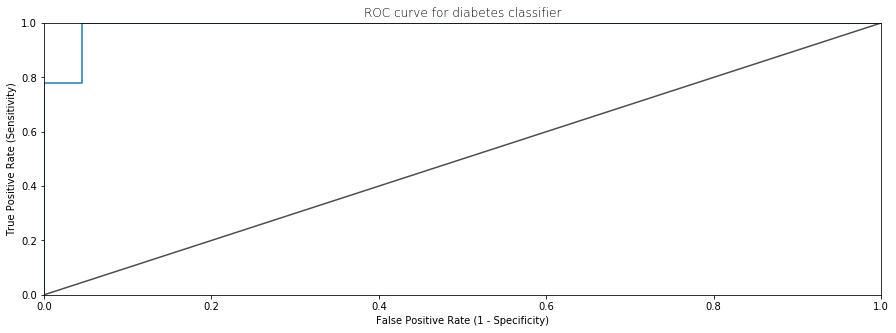

[[22  0]
 [ 3  6]]
('AUC Score :', 0.98989898989898994)


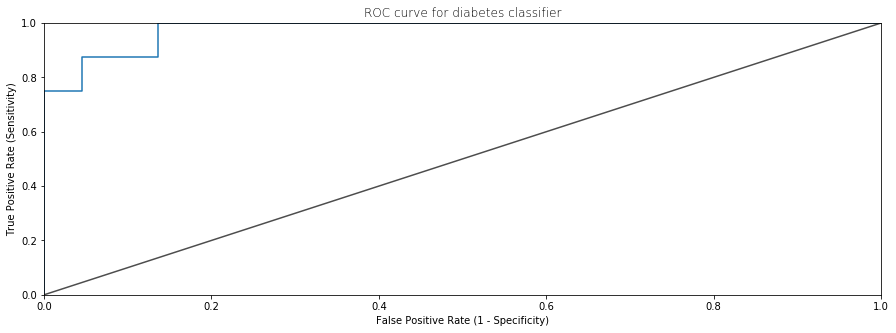

[[21  1]
 [ 1  7]]
('AUC Score :', 0.97727272727272729)


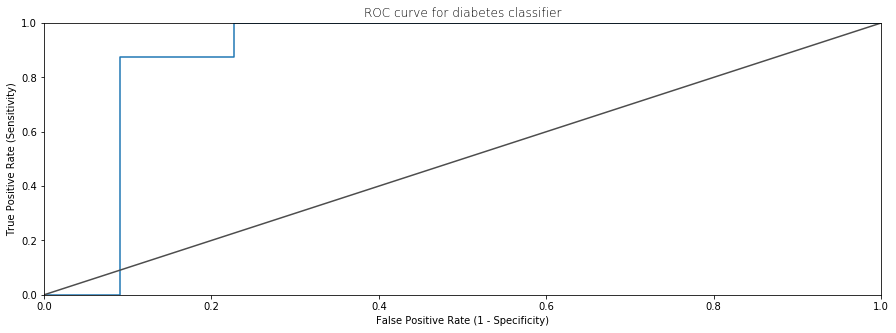

[[20  2]
 [ 2  6]]
('AUC Score :', 0.89204545454545447)


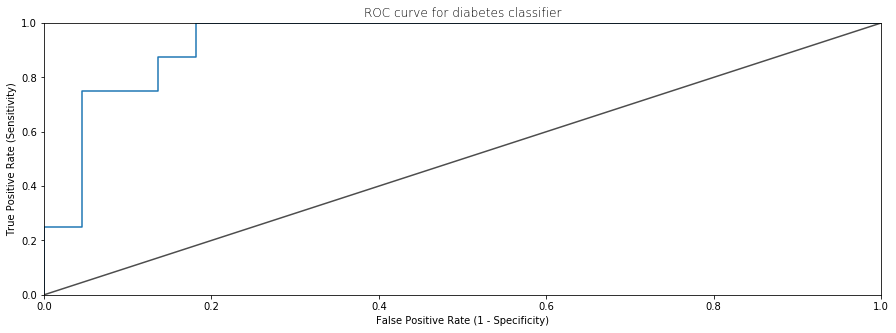

[[20  2]
 [ 2  6]]
('AUC Score :', 0.9375)


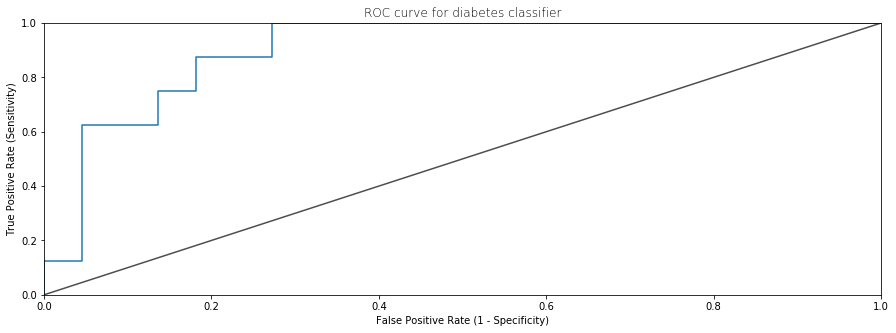

[[18  4]
 [ 2  6]]
('AUC Score :', 0.90340909090909094)


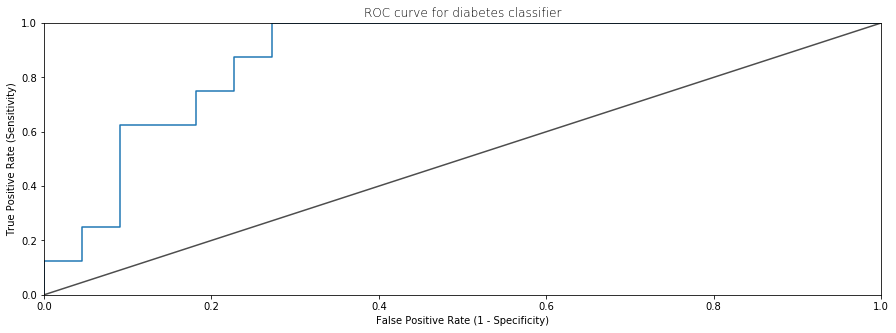

[[18  4]
 [ 3  5]]
('AUC Score :', 0.875)


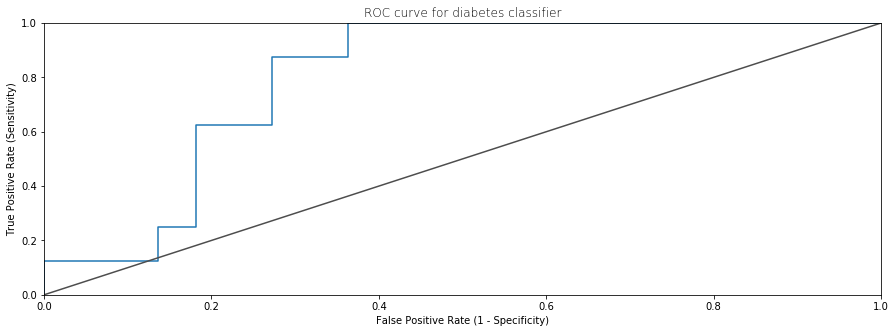

[[17  5]
 [ 3  5]]
('AUC Score :', 0.80113636363636365)


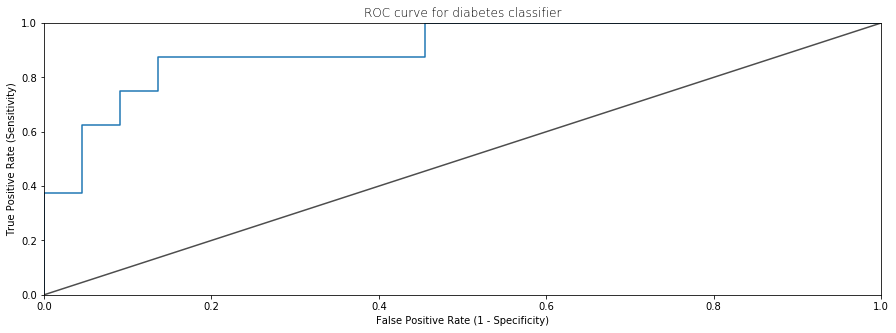

[[21  1]
 [ 3  5]]
('AUC Score :', 0.90340909090909083)


In [65]:
#stratifiedkfold
cv_score = []
folds = StratifiedKFold(n_splits=10, random_state= 0, shuffle=True)
for train_index, test_index in folds.split(new_x, y):
    x_train, x_test = new_x.loc[train_index], new_x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    model3.fit(x_train, y_train)
    final_prob = model3.predict_proba(x_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, final_prob[:, 1])
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['figure.figsize'] = (15, 5)
    plt.title('ROC curve for diabetes classifier', fontweight = 30)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()
    
    auc_score = auc(fpr, tpr)
    cv_score.append(auc_score)
    print confusion_matrix(y_test, model3.predict(x_test))
    print("AUC Score :", auc_score)
    
    

In [66]:
np.mean(cv_score)

0.91029040404040418

In [69]:
type(new_x)

pandas.core.frame.DataFrame

In [72]:
type(x_test)

pandas.core.frame.DataFrame

In [73]:
#stratifiedkfold
cv_score = []
folds = StratifiedKFold(n_splits=10, random_state= 0, shuffle=True)
for train_index, test_index in folds.split(x_train, y_train):
    x_tr, x_te = x_train.loc[train_index], x_train.loc[test_index]
    y_tr, y_te = y_train.loc[train_index], y_train.loc[test_index]
    model3.fit(x_tr, y_tr)
    final_prob = model3.predict_proba(x_te)
    
    fpr, tpr, thresholds = roc_curve(y_te, final_prob[:, 1])
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['figure.figsize'] = (15, 5)
    plt.title('ROC curve for diabetes classifier', fontweight = 30)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()
    
    auc_score = auc(fpr, tpr)
    cv_score.append(auc_score)
    print confusion_matrix(y_te, model3.predict(x_te))
    print("AUC Score :", auc_score)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [99]:
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
    print "ok"
    test_pred=model.predict(test)
    print test_pred.shape
    print test.shape
    return [test_pred.reshape(-1,1),train_pred]

In [100]:
model1 = DecisionTreeClassifier(random_state=1)

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=x_train,test=x_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

ok
(30,)
(30, 31)


In [105]:
model2 = KNeighborsClassifier()

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=x_train,test=x_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

ok
(30,)
(30, 31)


In [106]:
test_pred2.shape

(30, 1)

In [107]:
y_test.shape

(30,)

In [108]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
model.score(df_test, y_test)

0.73333333333333328

In [109]:
df.shape

(273, 2)

In [110]:
df.head()

,0,0
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,0.0
4,0.0,0.0


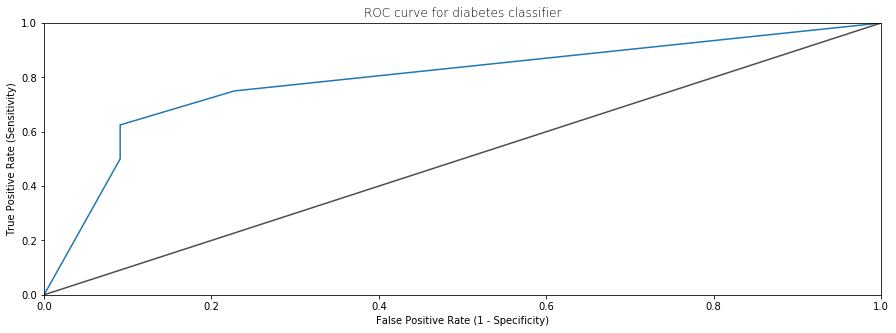

[[22  0]
 [ 8  0]]
('AUC Score :', 0.79261363636363635)


In [112]:
final_prob = model.predict_proba(df_test)
    
fpr, tpr, thresholds = roc_curve(y_test, final_prob[:, 1])
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

auc_score = auc(fpr, tpr)
cv_score.append(auc_score)
print confusion_matrix(y_test, model.predict(df_test))
print("AUC Score :", auc_score)

In [114]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state = 0, test_size = 0.2)

In [115]:
model1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

model2

In [132]:
model1.fit(x_train, y_train)
val_pred1=model1.predict(x_val)
test_pred1=model1.predict(x_test)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

model2.fit(x_train,y_train)
val_pred2=model2.predict(x_val)
test_pred2=model2.predict(x_test)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [126]:
test_pred1.shape

(30, 1)

In [131]:
df_val=pd.concat([x_val, val_pred1,val_pred2],axis=1)
df_test=pd.concat([x_test, test_pred1,test_pred2],axis=1)
print df_val.shape
print df_test.shape
print df_val.isnull().sum()
print df_test.isnull().sum()
print df_val
model = LogisticRegression()
model.fit(df_val,y_val)
model.score(df_test,y_test)

(103, 33)
(58, 33)
age                48
trestbps           48
chol               48
thalach            48
oldpeak            48
sex_0              48
sex_1              48
cp_0               48
cp_1               48
cp_2               48
cp_3               48
cp_4               48
fbs_0              48
fbs_1              48
restecg_0          48
restecg_1          48
restecg_2          48
exang_0            48
exang_1            48
slope_1            48
slope_2            48
slope_3            48
ca_0               48
ca_1               48
ca_2               48
ca_3               48
thal_1             48
thal_2             48
thal_fixed         48
thal_normal        48
thal_reversible    48
0                  48
0                  48
dtype: int64
age                28
trestbps           28
chol               28
thalach            28
oldpeak            28
sex_0              28
sex_1              28
cp_0               28
cp_1               28
cp_2               28
cp_3               28


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [154]:
from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor()
ada_model.fit(x_train, y_train)
ada_model.score(x_test,y_test)

0.33381695025697522

In [165]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
print confusion_matrix(model.predict(x_test), y_test)

[[40 11]
 [ 3  7]]


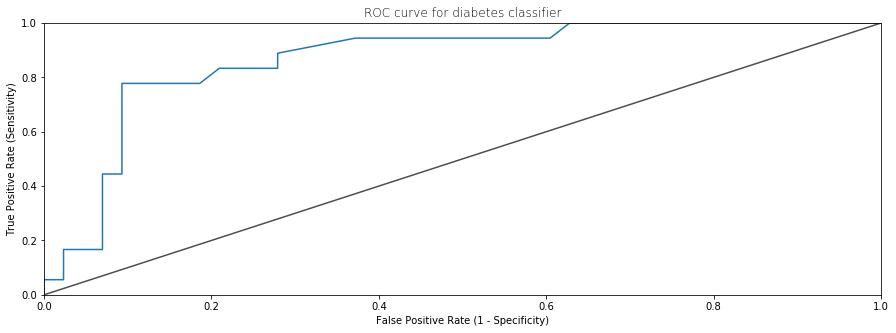

[[40  3]
 [11  7]]
('AUC Score :', 0.86821705426356588)


In [166]:
final_prob = model.predict_proba(x_test)
    
fpr, tpr, thresholds = roc_curve(y_test, final_prob[:, 1])
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

auc_score = auc(fpr, tpr)
cv_score.append(auc_score)
print confusion_matrix(y_test, model.predict(x_test))
print("AUC Score :", auc_score)

In [157]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.77049180327868849

In [167]:
confusion_matrix(y_true=y_test, y_pred=model.predict(x_test))

array([[40,  3],
       [11,  7]])